# Detection of Fraud Reviews: Modeling and Evaluation

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Reading datasets

## Train dataset

In [2]:
# Path to your CSV file
X_train_merged_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/X_train_merged.csv'

y_train_merged_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/y_train_merged.csv'

# Read the CSV file
X_train_merged = pd.read_csv(X_train_merged_path)

y_train_merged = pd.read_csv(y_train_merged_path)

Information

In [3]:
X_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542931 entries, 0 to 542930
Columns: 546 entries, word_count to yet
dtypes: float64(544), int64(2)
memory usage: 2.2 GB


In [4]:
y_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542931 entries, 0 to 542930
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   542931 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


Shape

In [5]:
X_train_merged.shape

(542931, 546)

In [6]:
y_train_merged.shape

(542931, 1)

Columns

In [7]:
X_train_merged.columns

Index(['word_count', 'avg_word_length', 'avg_sentence_length',
       'uppercase_char_count', 'rating', 'rating.1', 'Sentiment_Neutral',
       'Sentiment_Positive', 'category_Clothing_Shoes_and_Jewelry_5',
       'category_Electronics_5',
       ...
       'working', 'world', 'worth', 'would', 'wow', 'write', 'wrong', 'year',
       'yes', 'yet'],
      dtype='object', length=546)

In [8]:
y_train_merged.columns

Index(['label'], dtype='object')

Structure

In [9]:
# Display the first few rows
X_train_merged.head()

,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,rating.1,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,...,working,world,worth,would,wow,write,wrong,year,yes,yet
0,4,7.000000,4.000000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,159,4.226415,17.666667,17,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.143049,0.0,0.0,0.0,0.0,0.0,0.0
2,56,4.125000,18.666667,9,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,171,3.970760,9.500000,24,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,291,4.058419,13.857143,24,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y_train_merged.head()

,label
0,0
1,0
2,0
3,0
4,0


## Test dataset

In [11]:
# Path to your CSV file
X_test_merged_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/X_test_merged.csv'

y_test_merged_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/y_test_merged.csv'

# Read the CSV file
X_test_merged = pd.read_csv(X_test_merged_path)

y_test_merged = pd.read_csv(y_test_merged_path)

Information

In [12]:
X_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79124 entries, 0 to 79123
Columns: 546 entries, word_count to yet
dtypes: float64(544), int64(2)
memory usage: 329.6 MB


In [13]:
y_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79124 entries, 0 to 79123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   79124 non-null  int64
dtypes: int64(1)
memory usage: 618.3 KB


Shape

In [14]:
X_test_merged.shape

(79124, 546)

In [15]:
y_test_merged.shape

(79124, 1)

Columns

In [16]:
X_test_merged.columns

Index(['word_count', 'avg_word_length', 'avg_sentence_length',
       'uppercase_char_count', 'rating', 'rating.1', 'Sentiment_Neutral',
       'Sentiment_Positive', 'category_Clothing_Shoes_and_Jewelry_5',
       'category_Electronics_5',
       ...
       'working', 'world', 'worth', 'would', 'wow', 'write', 'wrong', 'year',
       'yes', 'yet'],
      dtype='object', length=546)

In [17]:
y_test_merged.columns

Index(['label'], dtype='object')

Structure

In [18]:
# Display the first few rows
X_test_merged.head()

,word_count,avg_word_length,avg_sentence_length,uppercase_char_count,rating,rating.1,Sentiment_Neutral,Sentiment_Positive,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,...,working,world,worth,would,wow,write,wrong,year,yes,yet
0,161,4.279503,14.636364,16,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.12641,0.000000,0.0,0.0
1,38,4.394737,12.666667,4,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0
2,93,3.892473,13.285714,27,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.192925,0.00000,0.147469,0.0,0.0
3,61,4.147541,7.625000,11,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.096842,0.0,0.000000,0.00000,0.000000,0.0,0.0
4,68,3.897059,11.333333,6,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.132394,0.0,0.000000,0.00000,0.000000,0.0,0.0


In [19]:
# Display the first few rows
y_test_merged.head()

,label
0,0
1,0
2,0
3,0
4,0


# Check for missing values

## Train dataset

In [20]:
# Check for missing values
X_train_merged.isnull().sum()

word_count              0
avg_word_length         0
avg_sentence_length     0
uppercase_char_count    0
rating                  0
                       ..
write                   0
wrong                   0
year                    0
yes                     0
yet                     0
Length: 546, dtype: int64

In [21]:
# Check for missing values
y_train_merged.isnull().sum()

label    0
dtype: int64

## Test dataset

In [22]:
# Check for missing values
X_test_merged.isnull().sum()

word_count              0
avg_word_length         0
avg_sentence_length     0
uppercase_char_count    0
rating                  0
                       ..
write                   0
wrong                   0
year                    0
yes                     0
yet                     0
Length: 546, dtype: int64

In [23]:
# Check for missing values
y_test_merged.isnull().sum()

label    0
dtype: int64

# Feature Selection

In [ ]:
num_features=100

In [ ]:
def feature_selection(X_train, y_train, X_test, num_features):

    selector = SelectKBest(score_func = f_classif, k=num_features)
    X_train_selected = selector.fit_transform(X_train, y_train['label'])
    X_test_selected = selector.transform(X_test)
    features = X_train.columns[selector.get_support()]

    # Plot feature importances
    feature_scores = selector.scores_[selector.get_support()]
    sorted_features = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
    plt.figure(figsize=(12, 6))
    plt.barh([x[0] for x in sorted_features], [x[1] for x in sorted_features])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Selected Features')
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
    for i, v in enumerate([x[1] for x in sorted_features]):
        plt.text(v, i, f"{v:.2f}", va='center')
    plt.show()
    
    return X_train_selected, X_test_selected, features

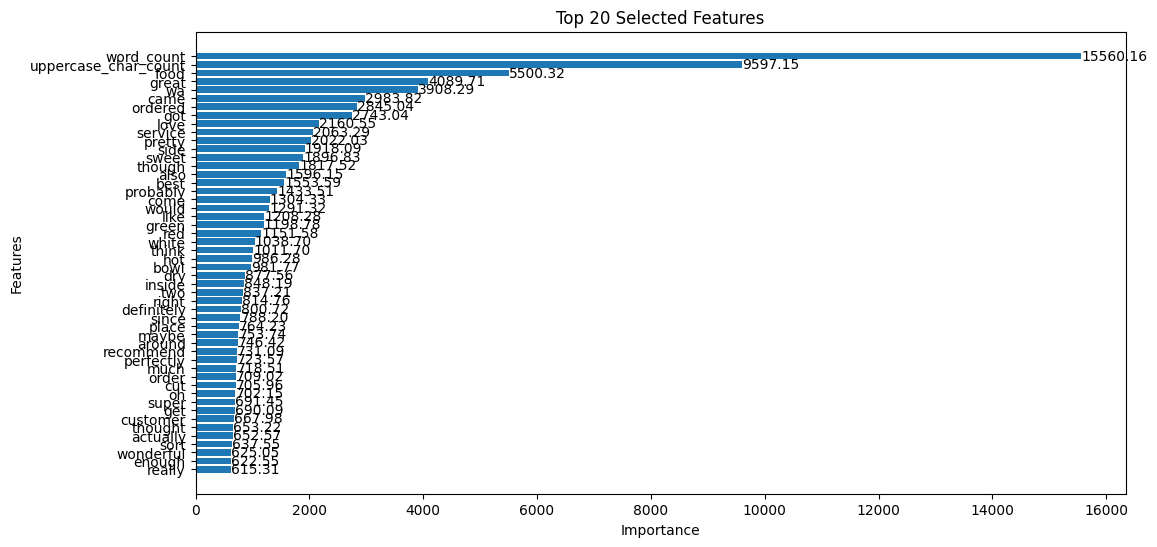

In [26]:
X_train_selected, X_test_selected, features = feature_selection(X_train_merged, y_train_merged, X_test_merged, num_features)

# Modeling

In [27]:
y_train_merged = y_train_merged['label']

In [28]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [29]:
# Hyperparameter tuning
n_iter=100
cv=5
scoring='roc_auc'
random_state=42

In [30]:
# General function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print and plot confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Calculate and print AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [31]:
# General function for hyperparameter tuning using RandomizedSearchCV
def hyperparameter_tuning(model, param_distributions, X_train, y_train, n_iter, cv, scoring, random_state):
    # Initialize RandomizedSearchCV
    randomized_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    
    # Fit RandomizedSearchCV
    randomized_search.fit(X_train, y_train)
    
    # Print the best parameters found
    print(f"Best parameters: {randomized_search.best_params_}")
    
    # Return the best estimator
    return randomized_search.best_estimator_

# Logistic Regression

## Initial model

In [34]:
# Define the initial model configuration
lg_model_config = {
    'max_iter': 1000,
    'random_state': 42
}

lg_model = LogisticRegression(**lg_model_config)


lg_param_distributions = {
    'max_iter': [100, 200, 300, 500, 1000],
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1, 1, 10, 100]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.55      0.68     67805
           1       0.19      0.64      0.30     11319

    accuracy                           0.56     79124
   macro avg       0.55      0.60      0.49     79124
weighted avg       0.80      0.56      0.63     79124

Confusion Matrix:


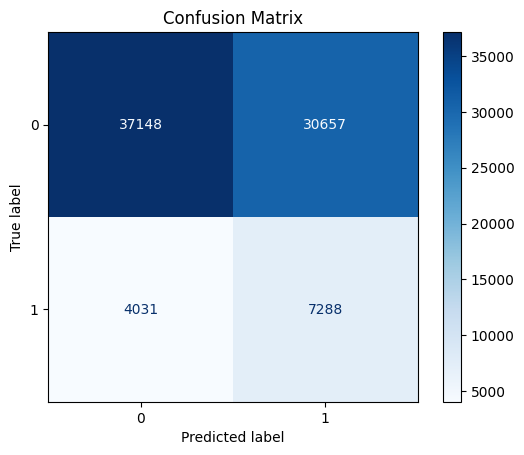

AUC-ROC: 0.6324


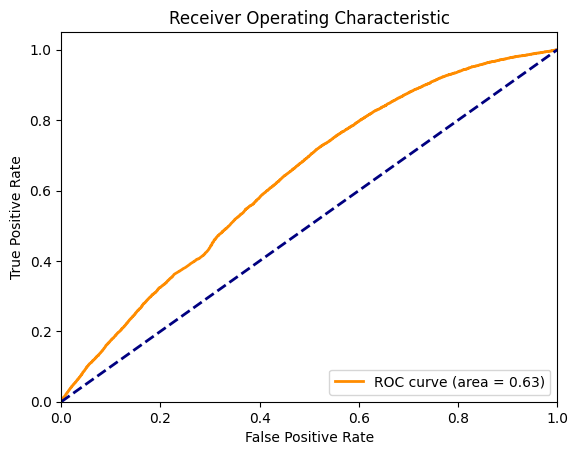

In [35]:
# Train and evaluate the model
train_and_evaluate_model(lg_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

## Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
lg_best_model = hyperparameter_tuning(lg_model, lg_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

## Tuned model

In [ ]:
# Evaluate the best model
train_and_evaluate_model(lg_best_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Adaboost Model

## Initial model

In [33]:
# Define the initial model configuration
ada_model_config = {
    'n_estimators': 50,
    'learning_rate': 1.0,
    'random_state': 42
}

ada_model = AdaBoostClassifier(**ada_model_config)


ada_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5]
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(ada_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

c:\Users\LeeShan\Fake-Reviews-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LeeShan\Fake-Reviews-Detection\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
ada_best_model = hyperparameter_tuning(ada_model, ada_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

## Tuned model

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(ada_best_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Gradient Boosting

## Initial model

In [ ]:
# Define the initial model configuration
gbc_model_config = {
    'n_estimators': 100,
    'criterion': 'friedman_mse',
    'max_depth': 3,
    'min_samples_split': 2,
    'learning_rate': 0.1,
    'random_state': 42
}

gbc_model = GradientBoostingClassifier(**gbc_model_config)


gbc_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(gbc_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

## Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
gbc_best_model = hyperparameter_tuning(gbc_model, gbc_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

## Tuned model

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(gbc_best_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# XGBoost

## Initial model

In [36]:
# Define the initial model configuration
xgb_model_config = {
    'n_estimators': 400,
    'max_depth': None,
    'eval_metric': 'logloss',
    'random_state': 42,
}

xgb_model = XGBClassifier(**xgb_model_config)


xgb_param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     67805
           1       0.41      0.17      0.24     11319

    accuracy                           0.85     79124
   macro avg       0.64      0.56      0.58     79124
weighted avg       0.81      0.85      0.82     79124

Confusion Matrix:


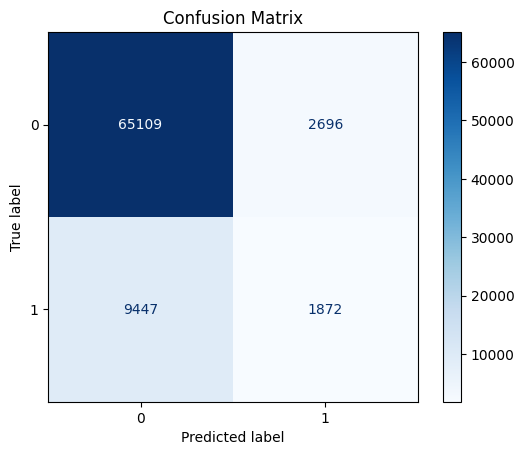

AUC-ROC: 0.6918


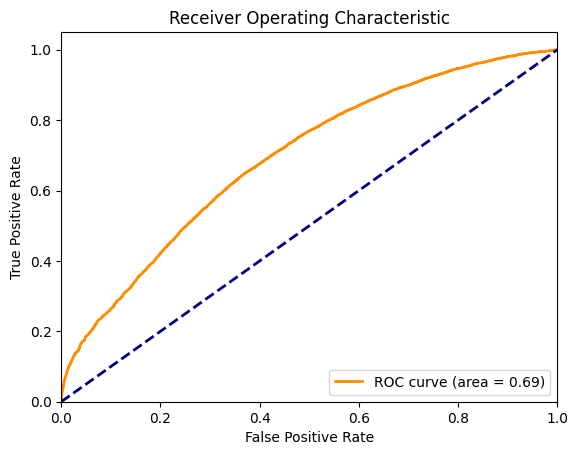

In [37]:
# Train and evaluate the model
train_and_evaluate_model(xgb_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

## Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
xgb_best_model = hyperparameter_tuning(xgb_model, xgb_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

## Tuned model

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(xgb_best_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

# Random Forest

## Initial model

In [38]:
# Define the initial model configuration
rf_model_config = {
    'n_estimators': 400,
    'criterion': 'log_loss',
    'max_depth': None,  # No limit on depth
    'min_samples_split': 2,
    'random_state': 42
}

rf_model = RandomForestClassifier(**rf_model_config)

rf_param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(rf_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

## Hyperparameter tuning

In [ ]:
# Perform hyperparameter tuning
rf_best_model = hyperparameter_tuning(rf_model, rf_param_distributions, X_train_scaled, y_train_merged, n_iter, cv, scoring, random_state)

## Tuned model

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(rf_best_model, X_train_scaled, y_train_merged, X_test_scaled, y_test_merged)

In [ ]:
# TF-IDF: Naive Bayes, Logistic Regression, Gradient Boosting, Adaboost, XGBoost, Random Forest

# word2vec: Logistic Regression, Gradient Boosting, Adaboost, XGBoost, Random Forest

# Tokenization: Bert, Roberta, LSTM

# Fine-tune: RandomizedSearch


# tf-idf, word2vec